In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns

In [ ]:
df=pd.read_csv('AB_NYC_2019.csv')

In [ ]:
#Explore the data 1) check data types
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [ ]:
#summary of structure befor preparing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#data description
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#columns list
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#top 10 values
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
#to disply no. of rows and columns
df.shape

(48895, 16)

In [ ]:
#bottom 5 values
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#to check null values
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#converting last_review col to datetime
#filling null values with update to date
df['last_review']=pd.to_datetime(df['last_review'])
df.fillna({'last_review':datetime.today()},inplace = True)

In [ ]:
df['reviews_per_month']=pd.to_numeric(df['reviews_per_month'], errors='coerce')
df.fillna({'reviews_per_month':0},inplace=True)

In [ ]:
df.fillna({'name':'UnKnown','host_name':'noHost'},inplace=True)

In [ ]:
df.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00.000000,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00.000000,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2025-07-30 16:36:05.649150,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00.000000,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00.000000,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22 00:00:00.000000,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05 00:00:00.000000,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24 00:00:00.000000,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21 00:00:00.000000,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09 00:00:00.000000,1.33,4,188


In [ ]:
#data after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [ ]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


/tmp/ipython-input-66-3468009653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_avg_price.index, y=borough_avg_price.values, palette='viridis')


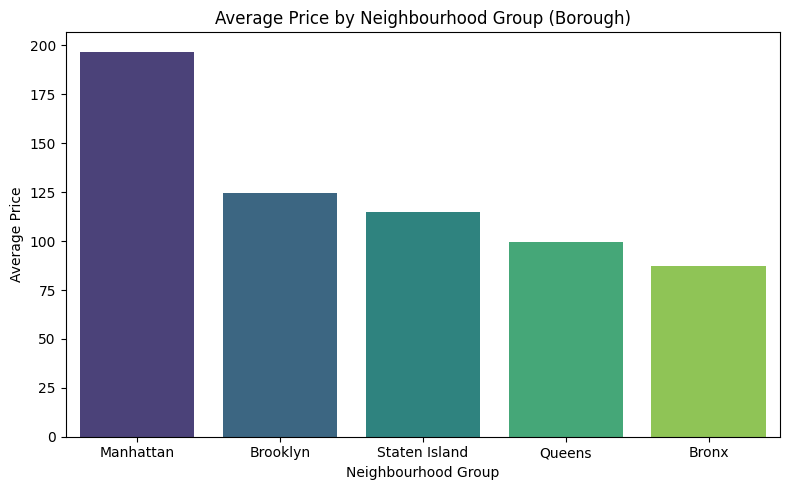

In [ ]:
#price trends
borough_avg_price= df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=borough_avg_price.index, y=borough_avg_price.values, palette='viridis')
plt.title('Average Price by Neighbourhood Group (Borough)')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Group')
plt.tight_layout()
plt.show()


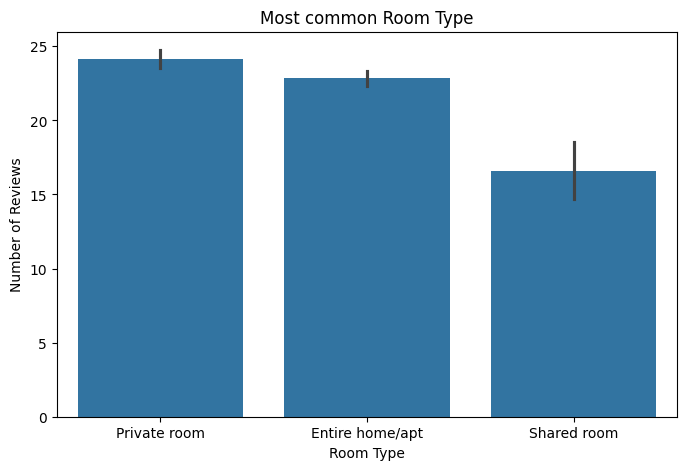

In [ ]:
#trends on room types
plt.figure(figsize=(8, 5))
sns.barplot( data=df,x='room_type', y='number_of_reviews')
plt.title('Most common Room Type')
plt.ylabel('Number of Reviews')
plt.xlabel('Room Type')
# plt.yscale('log') #logrithmic scale for better visuals
# plt.tight_layout()

plt.show()


In [ ]:
reviews_by_month_2 = df.dropna(subset=['last_review']).copy()
reviews_by_month_2['review_month'] = reviews_by_month_2['last_review'].dt.month
#dropping null values and extracting months

In [ ]:
#gruop by month and reviews
monthly_review=reviews_by_month_2.groupby('review_month')['number_of_reviews'].sum()

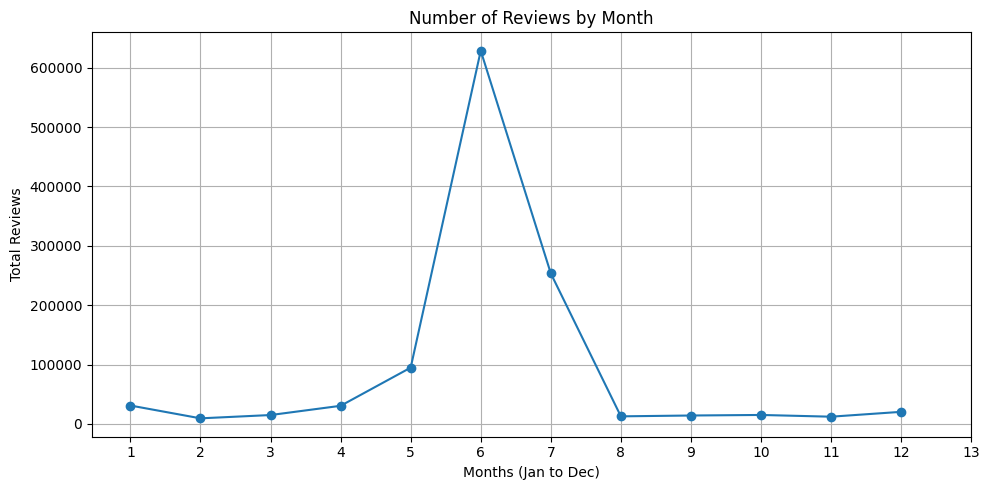

In [ ]:
plt.figure(figsize=(10, 5))
monthly_review.plot(kind='line', marker='o')
plt.title('Number of Reviews by Month')
plt.xlabel('Months (Jan to Dec)')
plt.ylabel('Total Reviews')
plt.grid(True)
plt.xticks(range(1,14))
plt.tight_layout()
plt.show()

In [ ]:
top_hosts = df['host_id'].value_counts().head(10)

# Top host (top count of host)
top_hosts_df = df[df['host_id'].isin(top_hosts.index)][['host_id', 'host_name']]
top_hosts_df = top_hosts_df.drop_duplicates().set_index('host_id').loc[top_hosts.index]
top_hosts_df['num_listings'] = top_hosts.values

print(top_hosts_df)

                   host_name  num_listings
host_id                                   
219517861       Sonder (NYC)           327
107434423         Blueground           232
30283594                Kara           121
137358866             Kazuya           103
16098958      Jeremy & Laura            96
12243051              Sonder            96
61391963   Corporate Housing            91
22541573                 Ken            87
200380610            Pranjal            65
7503643                 Vida            52


In [ ]:
#top hosts by reviews
host_reviews = df.groupby(['host_id', 'host_name'])['number_of_reviews'].sum().sort_values(ascending=False).head(10)
print(host_reviews)

host_id    host_name                     
37312959   Maya                              2273
344035     Brooklyn&   Breakfast    -Len-    2205
26432133   Danielle                          2017
35524316   Yasu & Akiko                      1971
40176101   Brady                             1818
4734398    Jj                                1798
16677326   Alex And Zeena                    1355
6885157    Randy                             1346
219517861  Sonder (NYC)                      1281
23591164   Angela                            1269
Name: number_of_reviews, dtype: int64


host_type
Busy Host      1.019197
Casual Host    1.100262
Name: reviews_per_month, dtype: float64


/tmp/ipython-input-75-3449914798.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=host_type_reviews.index, y=host_type_reviews.values, palette='pastel')


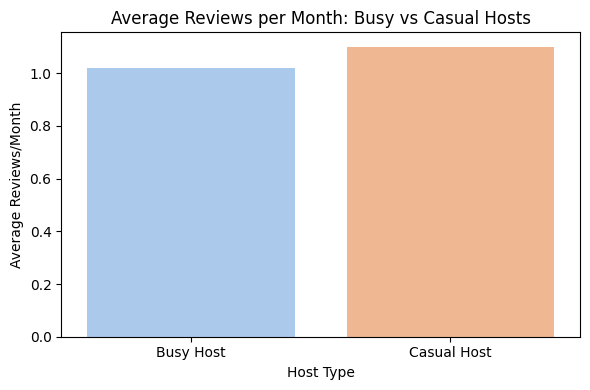

In [ ]:
df['host_type'] = df['calculated_host_listings_count'].apply(lambda x: 'Busy Host' if x >= 5 else 'Casual Host')

# Comparing the reviews per month
host_type_reviews = df.groupby('host_type')['reviews_per_month'].mean()
print(host_type_reviews)

plt.figure(figsize=(6, 4))
sns.barplot(x=host_type_reviews.index, y=host_type_reviews.values, palette='pastel')
plt.title('Average Reviews per Month: Busy vs Casual Hosts')
plt.ylabel('Average Reviews/Month')
plt.xlabel('Host Type')
plt.tight_layout()
plt.show()

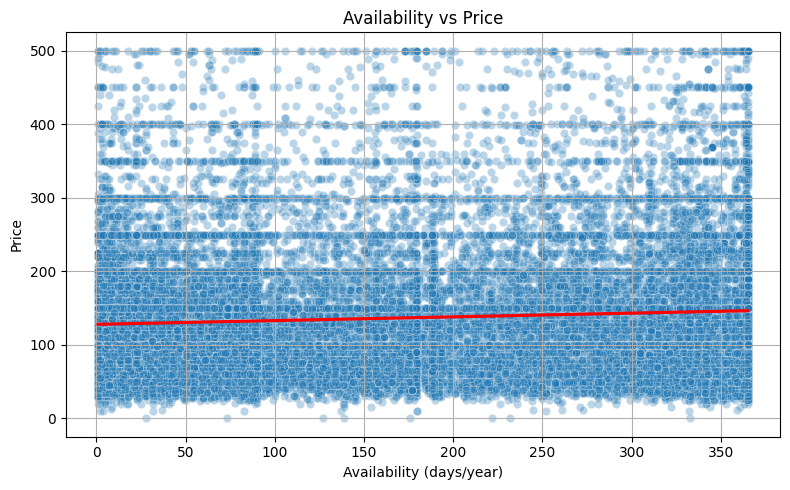

In [ ]:
#comparing avg availabilty with price
df_filtered = df[(df['price'] <= 500) & (df['availability_365'] > 0)]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_filtered, x='availability_365', y='price', alpha=0.3)
sns.regplot(data=df_filtered, x='availability_365', y='price', scatter=False, color='red')
plt.title('Availability vs Price')
plt.xlabel('Availability (days/year)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [ ]:
high_price= 1000
high_min_nights = 365

# Filtering out anomalies
anomalies = df[(df['price'] > high_price) | (df['minimum_nights'] > high_min_nights)]

# displaying top 5 anomalies
anomalies[['id', 'price', 'minimum_nights', 'neighbourhood_group', 'room_type']].head()

,id,price,minimum_nights,neighbourhood_group,room_type
496,174966,2000,30,Manhattan,Entire home/apt
762,273190,1300,5,Manhattan,Entire home/apt
946,363673,3000,7,Manhattan,Private room
1105,468613,1300,1,Manhattan,Private room
1305,568684,115,370,Brooklyn,Entire home/apt


**Do average prices differ across neighbourhood groups (boroughs)?**

Null hypothesis (H₀): Mean price is the same across all boroughs

Alternative hypothesis (H₁): At least one borough has a different average p

In [ ]:
from scipy import stats

# Filtering out extreme prices (i.e., above 1000)
df_filtered = df[df['price'] <= 1000]

In [ ]:
grouped_prices = [group['price'].values for name, group in df_filtered.groupby('neighbourhood_group')]

# Run ANOVA
anova_result = stats.f_oneway(*grouped_prices)
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

F-statistic: 1159.7846555649799
p-value: 0.0


In [ ]:
#reults: refers to Average Price by Neighbourhood Group (Borough) graph
if anova_result.pvalue < 0.05:
    print("Reject H0: Average prices differ across boroughs.")
else:
    print("Fail to reject H0: No significant difference in average prices.")

Reject H0: Average prices differ across boroughs.


**Is there a correlation between price and reviews??**

H₀ (Null Hypothesis): There is no correlation between price and number of reviews

H₁ (Alternative Hypothesis): There is a significant correlation between price and number of reviews

In [ ]:
#initally remove extreme outliers
df_corr = df[(df['price'] <= 500) & (df['number_of_reviews'] > 0)]

**calculating correlation coefficent**

In [ ]:
from scipy.stats import pearsonr
#pearson for linear
corr1, pearson_c = pearsonr(df_corr['price'], df_corr['number_of_reviews'])
print("Pearson Correlation Coefficient:", corr1)
print("p-value:", pearson_c)

Pearson Correlation Coefficient: -0.03340926768960854
p-value: 6.438512136530659e-11


In [ ]:
from scipy.stats import spearmanr
#spearman for ranked or non-linear
corr2, spearman_c = spearmanr(df_corr['price'], df_corr['number_of_reviews'])
print("Spearman Correlation Coefficient:", corr2)
print("p-value:", spearman_c)

Spearman Correlation Coefficient: -0.002696197449711475
p-value: 0.5981272772011439



Correlation ≈ 0	No correlation

Correlation > 0.5	Moderate to strong positive relationship

Correlation < -0.5	Moderate to strong negative relationship

p-value < 0.05	Statistically significant

In [ ]:
#missing values
m_val = df.isnull().sum()
m_val[m_val > 0].sort_values(ascending=False)

,0


In [ ]:
#outliers in price and minimum_nights
df.describe()[['price', 'minimum_nights']]
df[df['price'] > 1000]
df[df['minimum_nights'] > 365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_type
1305,568684,800sqft apartment with huge terrace,2798644,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15 00:00:00.000000,0.09,1,365,Casual Host
2854,1615764,UnKnown,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,2025-07-30 16:36:05.649150,0.00,1,362,Casual Host
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09 00:00:00.000000,0.03,1,365,Casual Host
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24 00:00:00.000000,0.57,1,90,Casual Host
8014,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,2025-07-30 16:36:05.649150,0.00,1,362,Casual Host
10829,8341919,Brand New Luxury Apt Lease Takeover,43945071,Shining,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,2025-07-30 16:36:05.649150,0.00,1,365,Casual Host
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22 00:00:00.000000,0.22,1,365,Casual Host
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04 00:00:00.000000,0.07,1,42,Casual Host
14285,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,2025-07-30 16:36:05.649150,0.00,1,358,Casual Host
15946,12888849,"Bright Luxury Studio, Central Loc.",16476167,Sarah,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,2025-07-30 16:36:05.649150,0.00,1,365,Casual Host


In [ ]:
#modification of outliers / eleminating outliers
df = df[df['price'] <= 1000]
df = df[df['minimum_nights'] <= 365]

In [ ]:
#checking and modifying for zero values(i.e., inactive insights)
df[df['availability_365'] == 0].shape
df[df['number_of_reviews'] == 0].shape
active = df[(df['availability_365'] > 0) & (df['number_of_reviews'] > 0)]
active

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_type
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Busy Host
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Casual Host
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Casual Host
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,Casual Host
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,Casual Host
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147,Casual Host
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339,Busy Host
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87,Casual Host
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40,Casual Host


In [ ]:
#checking for duplicates
df['id'].duplicated().sum()
df['host_id'].duplicated().sum()

np.int64(11370)

In [ ]:
#removing duplicates
df.drop_duplicates(inplace=True)
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.864200e+04,4.864200e+04,48642.000000,48642.000000,48642.000000,48642.000000,48642.000000,48642,48642.000000,48642.000000,48642.000000
mean,1.901874e+07,6.762023e+07,40.728934,-73.952043,141.280910,6.783068,23.362506,2020-02-24 05:25:30.584975360,1.094943,7.163562,112.393467
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.476202e+06,7.831209e+06,40.690020,-73.982970,69.000000,1.000000,1.000000,2018-11-04 00:00:00,0.040000,1.000000,0.000000
50%,1.967676e+07,3.082690e+07,40.722970,-73.955595,105.000000,3.000000,5.000000,2019-06-13 00:00:00,0.380000,1.000000,44.000000
75%,2.913822e+07,1.074344e+08,40.763130,-73.936110,175.000000,5.000000,24.000000,2019-07-04 00:00:00,1.590000,2.000000,225.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,1000.000000,365.000000,629.000000,2025-07-30 16:36:05.649150,58.500000,327.000000,365.000000
std,1.097831e+07,7.859807e+07,0.054570,0.046169,116.743586,16.122027,44.635504,NaN,1.599620,33.027549,131.398711


In [ ]:
df.head(30)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_type
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00.000000,0.21,6,365,Busy Host
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00.000000,0.38,2,355,Casual Host
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2025-07-30 16:36:05.649150,0.00,1,365,Casual Host
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00.000000,4.64,1,194,Casual Host
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00.000000,0.10,1,0,Casual Host
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22 00:00:00.000000,0.59,1,129,Casual Host
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05 00:00:00.000000,0.40,1,0,Casual Host
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24 00:00:00.000000,3.47,1,220,Casual Host
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21 00:00:00.000000,0.99,1,0,Casual Host
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09 00:00:00.000000,1.33,4,188,Casual Host
